# Atoti- a Data Analytics platform

In [1]:
import atoti as tt

Welcome to Atoti 0.9.3!

By using this community edition, you agree with the license available at https://docs.atoti.io/latest/eula.html.
Browse the official documentation at https://docs.atoti.io.
Join the community at https://www.atoti.io/register.

Atoti collects telemetry data, which is used to help understand how to improve the product.
If you don't wish to send usage data, you can request a trial license at https://www.atoti.io/evaluation-license-request.

You can hide this message by setting the `ATOTI_HIDE_EULA_MESSAGE` environment variable to True.


# Create a new Session

In [9]:
session = tt.Session.start()

In [10]:
# Load insurance data into table
# Reading file downloaded from: https://www.kaggle.com/datasets/sanjay0/fl-insurance-samplecsv?resource=download

policy_table = session.read_csv("data/FL_insurance_sample.csv", keys={"policyID"}, table_name="Policy")

26 error(s) occurred while feeding the table Policy. Check the session's logs for more details.


In [11]:
policy_table

In [12]:
policy_table.head()

,statecode,county,eq_site_limit,hu_site_limit,fl_site_limit,fr_site_limit,tiv_2011,tiv_2012,eq_site_deductible,hu_site_deductible,fl_site_deductible,fr_site_deductible,point_latitude,point_longitude,line,construction,point_granularity
policyID,,,,,,,,,,,,,,,,,
964837,FL,DUVAL COUNTY,0.0,82294.74,0.0,0.0,82294.74,86223.82,0.0,0.0,0,0,30.37071,-81.66205,Residential,Wood,1
677169,FL,DUVAL COUNTY,0.0,6992348.64,0.0,0.0,6992348.64,7824382.18,0.0,0.0,0,0,30.362661,-81.421577,Commercial,Reinforced Masonry,3
417525,FL,DUVAL COUNTY,0.0,72916.85,0.0,0.0,72916.85,102535.39,0.0,0.0,0,0,30.354658,-81.39959,Residential,Wood,1
234425,FL,DUVAL COUNTY,183600.0,183600.0,183600.0,183600.0,183600.0,200454.48,0.0,5508.0,0,0,30.1912,-81.74585,Residential,Wood,1
227315,FL,DUVAL COUNTY,0.0,1256618.48,0.0,0.0,1256618.48,1279820.68,0.0,0.0,0,0,30.300196,-81.556351,Residential,Masonry,1


In [24]:
policy_table.row_count # Total Rows

36608

In [26]:
list(policy_table) # policy_table.columns # Column Names

['policyID',
 'statecode',
 'county',
 'eq_site_limit',
 'hu_site_limit',
 'fl_site_limit',
 'fr_site_limit',
 'tiv_2011',
 'tiv_2012',
 'eq_site_deductible',
 'hu_site_deductible',
 'fl_site_deductible',
 'fr_site_deductible',
 'point_latitude',
 'point_longitude',
 'line',
 'construction',
 'point_granularity']

In [34]:
policy_table['county']

In [40]:
policy_table.scenarios

# Creating 'Cube' from a CSV file and learning multidimensional concepts such as cube, dimension, hierarchy, measure.
### A cube is a multidimensional view of some data, making it easy to explore, aggregate, filter and compare. 
### It’s called a cube because each attribute of the data can be represented as a dimension of the cube

#### Refer: https://docs.atoti.io/latest/getting_started/tutorial/tutorial.html

In [14]:
cube = session.create_cube(policy_table)

In [ ]:
# The axes of the cube are called hierarchies
# Numeric indicators at specific coordinates of the cube are called measures

In [15]:
hierar = cube.hierarchies

In [16]:
hierar

{('Policy', 'policyID'): <atoti.hierarchy.Hierarchy object at 0x0000026E3D1025D0>, ('Policy', 'construction'): <atoti.hierarchy.Hierarchy object at 0x0000026E3D159910>, ('Policy', 'statecode'): <atoti.hierarchy.Hierarchy object at 0x0000026E3D15B750>, ('Policy', 'line'): <atoti.hierarchy.Hierarchy object at 0x0000026E3D15B950>, ('Policy', 'county'): <atoti.hierarchy.Hierarchy object at 0x0000026E3D15BB10>}

In [17]:
measure = cube.measures
measure

{'fr_site_deductible.MEAN': <atoti.measure.Measure object at 0x0000026E3D179AD0>, 'point_latitude.MEAN': <atoti.measure.Measure object at 0x0000026E3CAEA910>, 'point_granularity.SUM': <atoti.measure.Measure object at 0x0000026E3CF7F510>, 'hu_site_limit.SUM': <atoti.measure.Measure object at 0x0000026E3D1798D0>, 'eq_site_deductible.SUM': <atoti.measure.Measure object at 0x0000026E3D179C10>, 'fl_site_deductible.SUM': <atoti.measure.Measure object at 0x0000026E3D179B10>, 'eq_site_deductible.MEAN': <atoti.measure.Measure object at 0x0000026E3D179050>, 'hu_site_limit.MEAN': <atoti.measure.Measure object at 0x0000026E3D179A50>, 'tiv_2011.SUM': <atoti.measure.Measure object at 0x0000026E3D179890>, 'hu_site_deductible.SUM': <atoti.measure.Measure object at 0x0000026E3D179090>, 'fl_site_limit.SUM': <atoti.measure.Measure object at 0x0000026E3D179490>, 'update.TIMESTAMP': <atoti.measure.Measure object at 0x0000026E3D179850>, 'hu_site_deductible.MEAN': <atoti.measure.Measure object at 0x0000026E3D1794D0>, 'point_granularity.MEAN': <atoti.measure.Measure object at 0x0000026E3D1793D0>, 'eq_site_limit.MEAN': <atoti.measure.Measure object at 0x0000026E3D179F90>, 'point_longitude.SUM': <atoti.measure.Measure object at 0x0000026E3D179A10>, 'fr_site_limit.MEAN': <atoti.measure.Measure object at 0x0000026E3D178AD0>, 'eq_site_limit.SUM': <atoti.measure.Measure object at 0x0000026E3D1791D0>, 'fr_site_limit.SUM': <atoti.measure.Measure object at 0x0000026E3D178C50>, 'tiv_2011.MEAN': <atoti.measure.Measure object at 0x0000026E3D179BD0>, 'fl_site_deductible.MEAN': <atoti.measure.Measure object at 0x0000026E3D178450>, 'fr_site_deductible.SUM': <atoti.measure.Measure object at 0x0000026E3D178590>, 'point_longitude.MEAN': <atoti.measure.Measure object at 0x0000026E3D17BF10>, 'contributors.COUNT': <atoti.measure.Measure object at 0x0000026E3D179C50>, 'tiv_2012.MEAN': <atoti.measure.Measure object at 0x0000026E3D179B50>, 'fl_site_limit.MEAN': <atoti.measure.Measure object at 0x0000026E3D179450>, 'point_latitude.SUM': <atoti.measure.Measure object at 0x0000026E3D179C90>, 'tiv_2012.SUM': <atoti.measure.Measure object at 0x0000026E3D1797D0>}

### Query with cube

In [20]:
cube.query(measure['contributors.COUNT'])

,contributors.COUNT
0,"36,608"


In [23]:
policy_table['county']

'county'

# Visualizing the Session

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
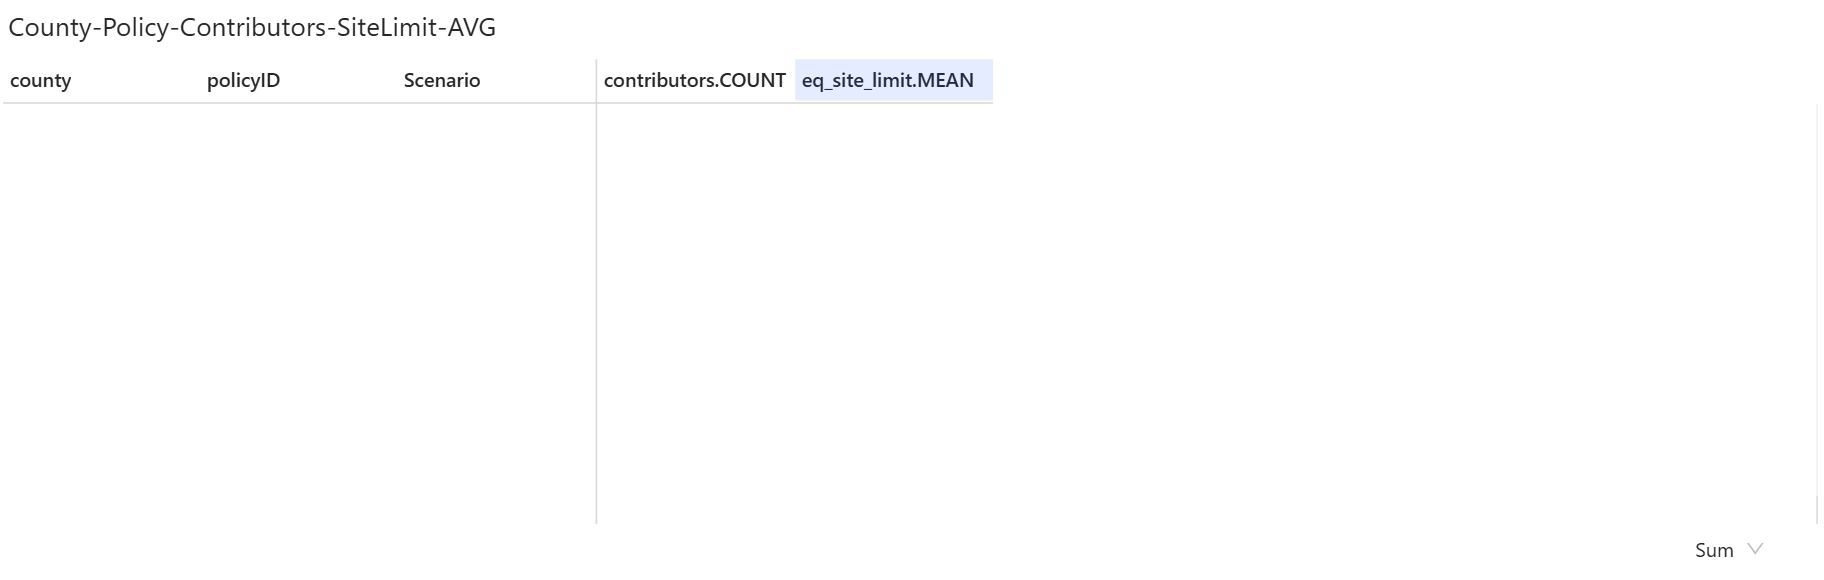

In [36]:
session.widget

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
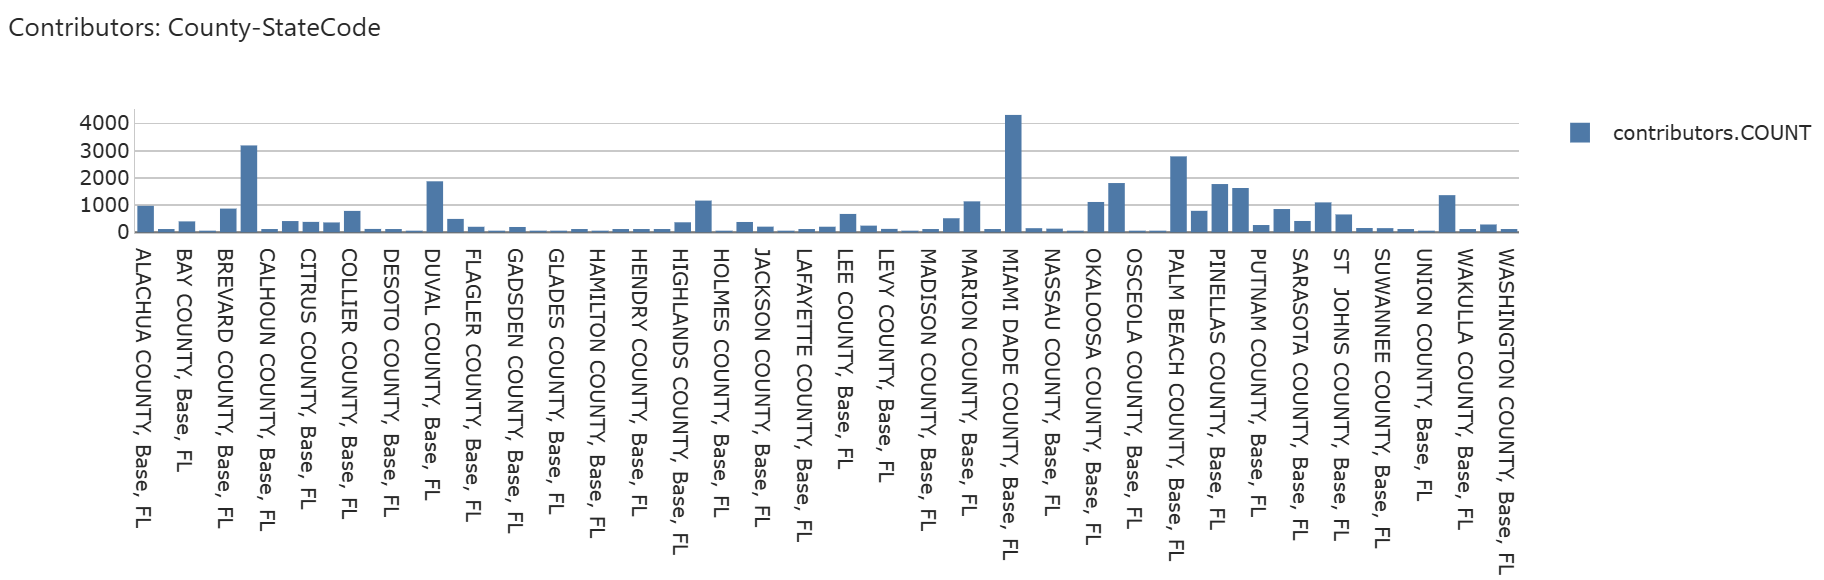

In [37]:
session.widget

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
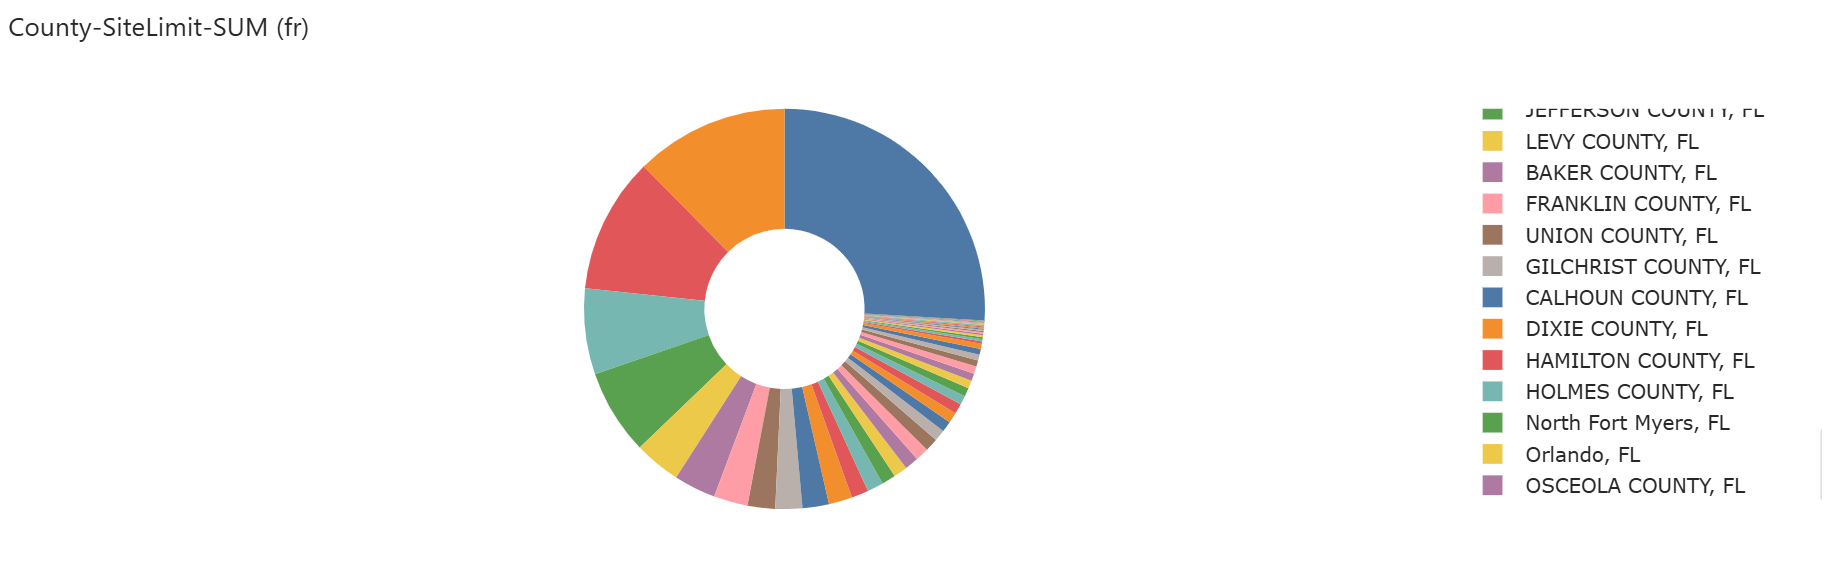

In [41]:
session.widget

# Dashboards

## Atoti comes with a web app that can be accessed outside of the notebook and where widgets can be laid out to form dashboards.

In [44]:
# Get Session Link

session.url

'http://localhost:51957'

## Create Dashboards
### Add Widgets
### Export to PDF
### Create PNG

### Reference: https://docs.activeviam.com/products/atoti/ui/5.2/docs/user-guides/app-structure/home-page/

# Closing the Session

In [46]:
session.close()